# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [100]:
#Import all the required libraries
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
# np.set_printoptions(threshold=np.inf)
from tqdm import tqdm
import time

from collections import Counter
import glob
import os
import cv2
from skimage import io 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords


import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2.1.0
2.2.4-tf


Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create word-to-index and index-to-word mappings.

4.Create a dataframe which summarizes the image, path & captions as a dataframe

5.Visualise the top 30 occuring words in the captions

6.Create a list which contains all the captions & path


In [2]:
#Import the dataset and read the image into a seperate variable

images=r'C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


In [3]:
images

'C:\\Users\\taran\\Desktop\\PGD ML & AI\\9. Capstone\\My_Capstone\\Data\\Images'

Dimensions of this image is : (432, 500, 3)


,image,caption
39180,688210930_85c5675d5b.jpg,A blue-robed and hooded figure is walking past occupied tables in an upper-class room .
39181,688210930_85c5675d5b.jpg,A figure in blue robes walks around in a hotel lobby .
39182,688210930_85c5675d5b.jpg,A person dressed in a blue hooded cloak with several people in the background .
39183,688210930_85c5675d5b.jpg,A person in a scary gray robe .
39184,688210930_85c5675d5b.jpg,The man dressed in a blue wizard 's outfit is walking through a building .


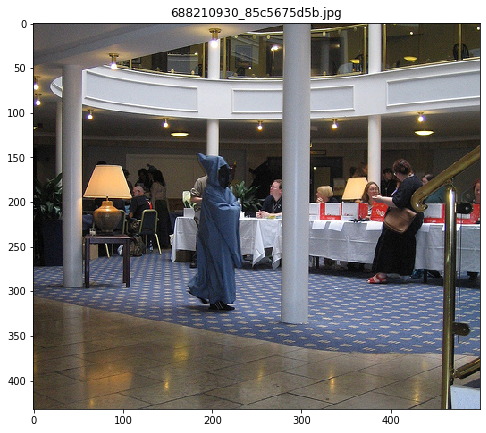

In [4]:
# Visualise both the images & text present in the dataset
def show_image():    
    all_img = os.listdir(images)
    random_image = np.random.randint(len(all_imgs))
    ran_img = all_img[random_image]
    img = io.imread(images + '\\' + ran_img)
    plt.figure(figsize=(8,8))
    plt.title(ran_img)
#     plt.axis('off')
    plt.imshow(img)
    print('Dimensions of this image is :',img.shape)
    return(ran_img)
    
rand_img = show_image()


data_captions = pd.read_csv(r'C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\captions.txt',sep=',')
data_captions.loc[data_captions.image==rand_img]


In [5]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    
    #your code here
    text = pd.read_csv(r'C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data'+'/' + filename,sep=',')
    
    return text

text_file = 'captions.txt'
doc = load_doc(text_file)
print(doc.shape)
doc[:300]#.head(20)

(40455, 2)


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
...,...,...
295,1077546505_a4f6c4daa9.jpg,A boy in blue shorts slides down a slide into a pool .
296,1077546505_a4f6c4daa9.jpg,A boy in blue swimming trunks slides down a yellow slide into a wading pool with inflatable toys floating in the water .
297,1077546505_a4f6c4daa9.jpg,A boy rides down a slide into a small backyard pool .
298,1077546505_a4f6c4daa9.jpg,A boy sliding down a slide into a pool with colorful tubes .


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [6]:
all_img_id= doc.image                                               #store all the image id here
# print(type(all_img_id))
all_img_vector=[images + '\\' + ele for ele in all_img_id]           #store all the image path here
annotations=doc.caption.str.lower()                                 #store all the captions here

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 

print(df.shape)
df
# df.to_csv('ex.csv')

(40455, 3)


,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201_693b08cb0e.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\1000268201_693b08cb0e.jpg,a girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playhouse .
4,1000268201_693b08cb0e.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a wooden cabin .
...,...,...,...
40450,997722733_0cb5439472.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\997722733_0cb5439472.jpg,a man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\997722733_0cb5439472.jpg,a man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\997722733_0cb5439472.jpg,a person in a red shirt climbing up a rock face covered in assist handles .
40453,997722733_0cb5439472.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\997722733_0cb5439472.jpg,a rock climber in a red shirt .


In [7]:
# Create the vocabulary & the counter for the captions

stop_words = stopwords.words('english')
stop_words.append('.')
stop_words.append(',')
print('Stop Words : ',stop_words)

vocabulary = [word.lower() for sent in list(df.Captions) for word in sent.split() if word not in stop_words] #write your code here
print('\n\nTotal Words in the Captions after removing stop words :',len(vocabulary))
val_count=Counter(vocabulary)
val_count

Stop Words :  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', '

Counter({'child': 1545,
         'pink': 735,
         'dress': 348,
         'climbing': 502,
         'set': 108,
         'stairs': 109,
         'entry': 1,
         'way': 50,
         'girl': 3328,
         'going': 149,
         'wooden': 284,
         'building': 510,
         'little': 1768,
         'playhouse': 6,
         'cabin': 4,
         'black': 3832,
         'dog': 8136,
         'spotted': 37,
         'fighting': 132,
         'tri-colored': 14,
         'playing': 2008,
         'road': 388,
         'white': 3940,
         'brown': 2563,
         'spots': 29,
         'staring': 57,
         'street': 943,
         'two': 5638,
         'dogs': 2125,
         'different': 45,
         'breeds': 5,
         'looking': 742,
         'pavement': 48,
         'moving': 41,
         'toward': 146,
         'covered': 306,
         'paint': 61,
         'sits': 577,
         'front': 1386,
         'painted': 63,
         'rainbow': 22,
         'hands': 246,
        

Below is the visualization of top 30 occuring words after removing the stop words from the captions.


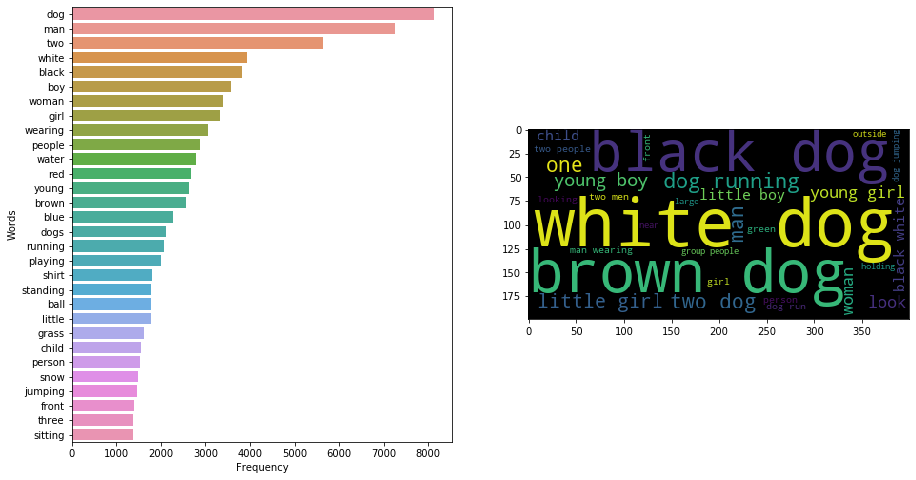

In [8]:
#Visualise the top 30 occuring words in the captions
li = val_count.most_common(30)

x = [tup[0] for tup in li]
y = [tup[1] for tup in li]

print('Below is the visualization of top 30 occuring words after removing the stop words from the captions.')

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel('Frequency')
plt.ylabel('Words')
sb.barplot(y,x)

plt.subplot(1,2,2)
from wordcloud import WordCloud
plt.imshow(WordCloud(max_words=30).generate(' '.join(vocabulary)))

#write your code here

In [9]:
#Create a list which contains all the captions
# annotations= #write your code here
annotations=[]
#add the <start> & <end> token to all those captions as well
for sent in df.Captions:
    temp_list = sent.split()
    temp_list.pop(temp_list.index(temp_list[-1]))
    temp_list.insert(0,'<start>')
    temp_list.append('<end>')
    annotations.append(' '.join(temp_list))
    
#Create a list which contains all the path to the images
all_img_path=set(all_img_vector) #write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [11]:
# annotations

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [12]:
print('Unique words in Corpus after removing the Stop Words : ',len(set(vocabulary)))

Unique words in Corpus after removing the Stop Words :  8800


In [14]:
# create the tokenizer
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size,oov_token='UNK',filters='"#$%&()*.!+,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(annotations)
#your code here

In [19]:
# Create word-to-index and index-to-word mappings.

word_index = tokenizer.word_index
index_word = tokenizer.index_word

print(word_index['UNK'],index_word[1])
#your code here

1 UNK


In [18]:
# word_index
# len(annotations_tokenised)
# print(index_word[1])

After fitting the tokenizer on the annotations (captions) the first sentence looks like below :
 [3, 2, 43, 5, 2, 91, 172, 8, 118, 52, 2, 405, 13, 412, 5, 29, 1, 665, 4] 

Below is the visualization of top 30 occuring words from the captions after text processing i.e. Tokenising them.


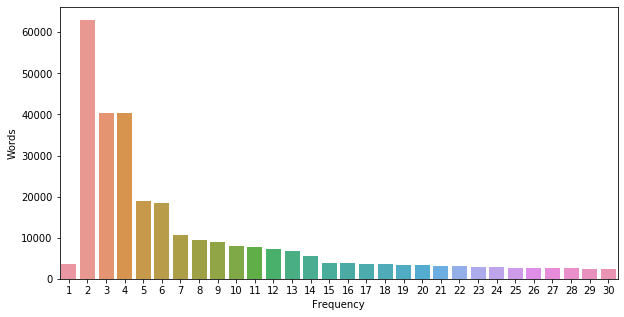

In [20]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

annotations_tokenised = tokenizer.texts_to_sequences(annotations) #note we have not removed stop words this tie from annotations(captions).
print('After fitting the tokenizer on the annotations (captions) the first sentence looks like below :\n',annotations_tokenised[0],'\n')
vocabulary_tokenised = [word for sent in annotations_tokenised for word in sent]

# print(len(vocabulary_tokenised))

val_count_tokenised = Counter(vocabulary_tokenised)
li_ = val_count_tokenised.most_common(30)

# print(li_)

x = [tup[0] for tup in li_]
y = [tup[1] for tup in li_]

print('Below is the visualization of top 30 occuring words from the captions after text processing i.e. Tokenising them.')

plt.figure(figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Words')
sb.barplot(x,y)

#your code here

<h2>Note:</h2> 
start and end tags are assigned token as 3 and 4 respectively.

In [21]:
print(index_word[4],index_word[3])

<end> <start>


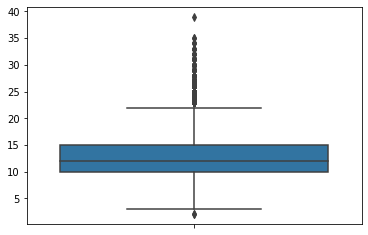

Longest Sequence in captions is of lenght : 39 

********************************************************************************
[[ 3  2 43 ...  0  0  0]
 [ 3  2 20 ...  0  0  0]
 [ 3  2 40 ...  0  0  0]
 ...
 [ 3  2 44 ...  0  0  0]
 [ 3  2 87 ...  0  0  0]
 [ 3  2 87 ...  0  0  0]]
The shape of Caption vector is :(40455, 39)


In [23]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

seq_lenghts = [len(sent) for sent in annotations_tokenised]

import seaborn as sb
sb.boxplot(y=seq_lenghts)
plt.show()

max_lenght_seq = max([len(sent) for sent in annotations_tokenised])
print('Longest Sequence in captions is of lenght :',max_lenght_seq,'\n')
print('*'*80)
cap_vector = pad_sequences(sequences=annotations_tokenised,maxlen=max_lenght_seq,padding='post') #your code here
print(cap_vector)
print("The shape of Caption vector is :" + str(cap_vector.shape))

## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [24]:
new_df = pd.DataFrame()

new_df['Image_ID'] = df.ID
new_df['Image_Path'] = df.Path
new_df['Captions'] = list(cap_vector)

new_df.head(5)

,Image_ID,Image_Path,Captions
0,1000268201_693b08cb0e.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\1000268201_693b08cb0e.jpg,"[3, 2, 43, 5, 2, 91, 172, 8, 118, 52, 2, 405, 13, 412, 5, 29, 1, 665, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1000268201_693b08cb0e.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\1000268201_693b08cb0e.jpg,"[3, 2, 20, 312, 65, 2, 195, 121, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,1000268201_693b08cb0e.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\1000268201_693b08cb0e.jpg,"[3, 2, 40, 20, 118, 65, 2, 195, 2950, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,1000268201_693b08cb0e.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\1000268201_693b08cb0e.jpg,"[3, 2, 40, 20, 118, 6, 412, 21, 61, 2950, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,1000268201_693b08cb0e.jpg,C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data\Images\1000268201_693b08cb0e.jpg,"[3, 2, 40, 20, 5, 2, 91, 172, 312, 65, 2, 195, 2951, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [25]:
# #write your code here

# x = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# image_data = x.flow_from_directory(r'C:\Users\taran\Desktop\PGD ML & AI\9. Capstone\My_Capstone\Data',
#                       target_size=(299,299),
#                       batch_size=8
#                      )

## Create the train & test data 
1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [26]:
#Train Test Split

# sampels_for_train = int((new_df.shape[0])*.80)
# # sampels_for_train
# train_samples = new_df[:sampels_for_train+1]
# test_samples = new_df[sampels_for_train+1:]


train_samples,test_samples = train_test_split(new_df,test_size=0.20,random_state=42)

print(train_samples.shape)
print(test_samples.shape)

(32364, 3)
(8091, 3)


In [27]:
#write your code here
print('Total Images for Training : ',len(train_samples.Image_Path))
print('Total Captions for Training : ',len(train_samples.Captions))

def load_images(path,captions):
    img = tf.io.read_file(path) #read the path as Tensor
    img = tf.image.decode_jpeg(img,channels=3) #Decode the image so i can understand the array
    img = tf.image.resize(img,(299,299)) #reshping or resizing the image to the dimentions we want
    img = tf.keras.applications.inception_v3.preprocess_input(img) #preprocess such that Inception_V3 understands
    print(img.shape)
    print(captions.shape)
    return(img,captions)
    
    
BATCH_SIZE = 10
AUTOTUNE = tf.data.experimental.AUTOTUNE

#Creating the Training dataset
train_data_set = tf.data.Dataset.from_tensor_slices((list(train_samples.Image_Path),list(train_samples.Captions))) # path images + caption

#applying load_images function as Tensor of paths and caption is being passed and then function returned the processed image and captions as it is.
train_data_set = train_data_set.map(load_images, num_parallel_calls=tf.data.experimental.AUTOTUNE)

#Shffling the data and making it available in the Batches

#Keeping Buffer size = 1000 
train_data_set = train_data_set.shuffle(buffer_size=1000).batch(BATCH_SIZE,drop_remainder=True).prefetch(buffer_size=AUTOTUNE)

print('*'*100)

#Creating Test dataset
test_data_set = tf.data.Dataset.from_tensor_slices((list(test_samples.Image_Path),list(test_samples.Captions)))

test_data_set = test_data_set.map(load_images, num_parallel_calls=AUTOTUNE)
#Shuffling won't impact anything
test_data_set = test_data_set.batch(BATCH_SIZE,drop_remainder=True).prefetch(buffer_size=AUTOTUNE)

Total Images for Training :  32364
Total Captions for Training :  32364
(299, 299, 3)
(39,)
****************************************************************************************************
(299, 299, 3)
(39,)


In [28]:
#test
for i , k in test_data_set:
    print(i.shape,'\n',k.shape)
    break

(10, 299, 299, 3) 
 (10, 39)


In [29]:
#test
for i,c in train_data_set:
    print(i.shape,'\n')
    print(c.shape)
    break

(10, 299, 299, 3) 

(10, 39)


In [30]:
#Test
sample_img_batch, sample_cap_batch = next(iter(train_data_set))
print(sample_img_batch.shape) #(batch_size, 299, 299, 3)
print(sample_cap_batch.shape) #(batch_size, max_len)

(10, 299, 299, 3)
(10, 39)


## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [31]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input     #write code here to get the input of the image_model
hidden_layer = image_model.output #write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(inputs=new_input,outputs=hidden_layer)  #build the final model using both input & output layer

In [35]:
# write your code to extract features from each image in the dataset

def extract_features_from_inceptionV3(image,cap):
    f = image_features_extract_model(image)
    feat_ = tf.reshape(f,(f.shape[0], -1, f.shape[3]))
    return(feat_,cap)



train_data_set = train_data_set.map(extract_features_from_inceptionV3, num_parallel_calls=AUTOTUNE)

test_data_set = test_data_set.map(extract_features_from_inceptionV3, num_parallel_calls=AUTOTUNE)

In [54]:
# For Understanding Purpose

x = tf.range(640)
x = tf.reshape(x,(8,8,10))
tf.reshape(x,(-1,10)).shape
# x

TensorShape([64, 10])

In [36]:
# x=[]
# for sub,cap  in train_data_set:
#     x.append(sub)
#     break

# extract_features_from_inceptionV3(x)

In [55]:
#test
for i,c in train_data_set:
    print(i.shape,'\n')
    print(c.shape)
    break

(10, 64, 2048) 

(10, 39)


In [56]:
sample_img_batch, sample_cap_batch = next(iter(train_data_set))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(10, 64, 2048)
(10, 39)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [57]:
embedding_dim = 256 
units = 512
vocab_size = 5000 + 1 #top 5,000 words +1
train_num_steps = len(train_samples) // BATCH_SIZE
test_num_steps = len(test_samples) // BATCH_SIZE

### Encoder

In [62]:
# x = tf.keras.Input?
# t_layer = tf.keras.layers.Dense(12,activation='relu')
# nump = tf.range(40)
# nump = tf.reshape(nump,(2,2,10))
# t_layer(nump)
# nump

In [63]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim, activation='relu') #build your Dense layer with relu activation
        
    def call(self, features):
        features = self.dense(features) #extract the features from the image shape: (batch, 8*8, embed_dim)
        
        return features

In [64]:
encoder=Encoder(embedding_dim)

### Attention model

In [65]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units, activation='relu') #build your Dense layer
        self.W2 = tf.keras.layers.Dense(units, activation='relu') #build your Dense layer
        self.V  = tf.keras.layers.Dense(1)  #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden): #axis =1
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1) # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        
        attention_hidden_layer = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))
        
        score = self.V(attention_hidden_layer) # build your score funciton to shape: (batch_size, 8*8, units)
        
        attention_weights = tf.nn.softmax(score, axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
        
        context_vector = attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)# reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [86]:
# tf.keras.layers.Embedding?
# tf.reduce_sum?

In [67]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size,embed_dim,input_length=max_lenght_seq) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed)# Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [68]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [85]:
# tf.expand_dims([tokenizer.word_index['<start>']] * 10, 1)
# tf.expand_dims(decoder.init_state(batch_size=sample_cap_batch.shape[0]),1)  # 10*512, 10*1*512

In [70]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (10, 64, 256)
Predcitions shape from Decoder: (10, 5001)
Attention weights shape from Decoder: (10, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [71]:
optimizer = tf.keras.optimizers.Adam() #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy() #define your loss object

In [87]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [88]:
checkpoint_path = r"C:\Users\taran\Desktop\Python Files\Assignments\Capstone"

checkpoint_path_ckpt = os.path.join(checkpoint_path)

ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path_ckpt, max_to_keep=5)

In [89]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [90]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        features = encoder(img_tensor)
        
        for i in range(1, target.shape[1]):
          # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)
        
        avg_loss = (loss / int(target.shape[1]))

        trainable_variables = encoder.trainable_variables + decoder.trainable_variables

        gradients = tape.gradient(loss, trainable_variables)

        optimizer.apply_gradients(zip(gradients, trainable_variables))


    return loss, avg_loss

In [91]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    #write your code here to do the testing steps
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    features = encoder(img_tensor)
    for i in range(1, target.shape[1]):
        # passing the features through the decoder
        predictions, hidden, _ = decoder(dec_input, features, hidden)
        loss += loss_function(target[:, i], predictions)
        # using teacher forcing
        dec_input = tf.expand_dims(target[:, i], 1)

    avg_loss = (loss / int(target.shape[1]))

    return loss, avg_loss

In [92]:
def test_loss_cal(test_dataset):
    total_loss = 0
    #write your code to get the average loss result on your test data
    
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    
    avg_test_loss=total_loss / test_num_steps
    return avg_test_loss
    
    return avg_test_loss

In [102]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_data_set):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_data_set)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights =  decoder(dec_input, features, hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy() #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [ ]:
def beam_evaluate(image, beam_index = #your value for beam index):

    #write your code to evaluate the result using beam search
                  
    return final_caption



In [ ]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:
rid = np.random.randint(0, len(img_test))
test_image = img_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=#set your weights)
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [ ]:
captions=beam_evaluate(test_image)
print(captions)